# 以TensorFlow张量运算仿真神经网络的运行

## 1 以矩阵运算仿真神经网络

输出 = 激活函数（输入x权重+偏差）

[y1 y2] = activation( [x1 x2 x3]x[w11 w12
                                  w21] )

In [42]:
#导入TensorFlow模块
import tensorflow as tf

In [43]:
def relu_sigmoid():
    X = tf.Variable([[0.4,0.2,0.4]])
    W = tf.Variable([[-0.5,-0.2],
                    [-0.3,0.4],
                    [-0.5,0.2]])
    b = tf.Variable([[0.1,0.2]])
    XWb = tf.matmul(X,W)+b
    y_relu=tf.nn.relu(tf.matmul(X,W)+b)                 #使用relu激活函数
    y_sigmoid=tf.nn.sigmoid(tf.matmul(X,W)+b)           #使用sigmoid激活函数
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        print('XWb:');print(sess.run(XWb))
        print('y_relu:');print(sess.run(y_relu))
        print('y_sigmoid:');print(sess.run(y_sigmoid))

In [44]:
relu_sigmoid()

XWb:
[[-0.35999998  0.28      ]]
y_relu:
[[0.   0.28]]
y_sigmoid:
[[0.41095957 0.5695462 ]]


Relu的特色是：小于0输出是0，大于0输出等于输入

对于深度学习模型，以反向传播算法进行训练时，训练前必须先“建立模型”，建立多层感知模型必须以随机数初始化模型的权重与偏差。TensorFlow提供tf.random_normal可以用来产生正态分布的随机数的矩阵。

In [45]:
def normal_dis():
    X = tf.Variable([[0.4,0.2,0.4]])
    W = tf.Variable(tf.random_normal([3,2]))
    b = tf.Variable(tf.random_normal([1,2]))
    XWb = tf.matmul(X,W)+b
    y_relu=tf.nn.relu(tf.matmul(X,W)+b)                 #使用relu激活函数
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        (b,W,y_relu) = sess.run((b,W,y_relu))           #执行一次sess.run取得3个TensorFlow变量
        print('b:');print(b)
        print('W:');print(W)
        print('y_relu:');print(y_relu)

In [46]:
normal_dis()

b:
[[-0.97734547  0.5086532 ]]
W:
[[ 0.316556    1.7016572 ]
 [-1.9309672   1.2214875 ]
 [-0.04145029 -0.78084785]]
y_relu:
[[0.        1.1212745]]


In [47]:
#正态分布的随机数展示
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
    norm_data = ts_norm.eval()
print(norm_data[:5])

[ 0.53228784  0.25847065  0.6145472   2.3748431  -0.8388968 ]


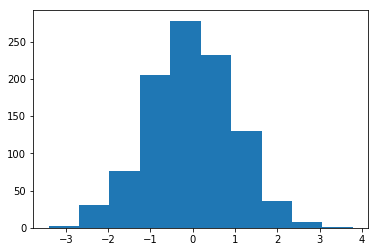

In [48]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

## 2 以placeholder传入X值

In [52]:
#以placeholder传入1x3的数组 
import numpy as np
def placeholder_input_1x1():
    W = tf.Variable(tf.random_normal([3,2]))
    b = tf.Variable(tf.random_normal([1,2]))
    #建立计算图时，定义placehoder X
    #“float”表示数据类型为浮点数，[Note,3]表示矩阵的形状。第一维设置为None,表示传入的X项数不想。
    #第二维是每一项的数字的个数，每一项有3个数字，所以设置为3
    X = tf.placeholder("float",[None,3])     
    y = tf.nn.relu(tf.matmul(X,W)+b)
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        X_array = np.array([[0.4,0.2,0.4]])        #建立X_array
        (_b,_W,_X,_y) = sess.run((b,W,X,y),feed_dict={X:X_array})
        print('b:');print(_b)
        print('W:');print(_W)
        print('X:');print(_X)
        print('y:');print(_y)

In [53]:
placeholder_input_1x1()

b:
[[-0.44156966 -0.25257966]]
W:
[[ 1.2209659  -0.8371656 ]
 [ 1.9725857   0.6605664 ]
 [-0.02733079 -0.48399118]]
X:
[[0.4 0.2 0.4]]
y:
[[0.43040153 0.        ]]


In [54]:
#以placeholder传入3x3的数组 
def placeholder_input_3x3():
    W = tf.Variable(tf.random_normal([3,2]))
    b = tf.Variable(tf.random_normal([1,2]))
    #建立计算图时，定义placehoder X
    #“float”表示数据类型为浮点数，[Note,3]表示矩阵的形状。第一维设置为None,表示传入的X项数不想。
    #第二维是每一项的数字的个数，每一项有3个数字，所以设置为3
    X = tf.placeholder("float",[None,3])     
    y = tf.nn.relu(tf.matmul(X,W)+b)
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        X_array = np.array([[0.4,0.2,0.4],
                            [0.3,0.4,0.5],
                            [0.3,-0.4,0.5]])        #建立X_array
        (_b,_W,_X,_y) = sess.run((b,W,X,y),feed_dict={X:X_array})
        print('b:');print(_b)
        print('W:');print(_W)
        print('X:');print(_X)
        print('y:');print(_y)

In [56]:
placeholder_input_3x3()

b:
[[-1.3363371  -0.01283835]]
W:
[[ 1.8546469   3.108467  ]
 [ 0.77843046  1.991848  ]
 [ 0.06419073 -0.5634582 ]]
X:
[[ 0.4  0.2  0.4]
 [ 0.3  0.4  0.5]
 [ 0.3 -0.4  0.5]]
y:
[[0.        1.4035349]
 [0.        1.4347119]
 [0.        0.       ]]


## 3 创建layer函数以矩阵运算仿真神经网络

In [57]:
#output_dim:输出的神经元数量
#input_dim:输入的神经元数量
#inputs:输入的二维数组的placeholder。
#activation:传入激活函数，默认是None
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim])) #以正态分布的随机数建立并且初始化W（权重）
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs,W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [58]:
#使用layer函数建立3层类神经网络
def run_layer():
    X = tf.placeholder("float",[None,4])
    h = layer(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
    y = layer(output_dim=2,input_dim=3,inputs=h)
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        X_array = np.array([[0.4,0.2,0.4,0.5]])
        (layer_X,layer_h,layer_y) = sess.run((X,h,y),feed_dict={X:X_array})
        print('input Layer X:');print(layer_X)
        print('hidden Layer h:');print(layer_h)
        print('output Layer y:');print(layer_y)

In [59]:
run_layer()

input Layer X:
[[0.4 0.2 0.4 0.5]]
hidden Layer h:
[[0.9396633 0.9441411 1.9303684]]
output Layer y:
[[ 5.5895567 -2.3082125]]


## 4 建立layer_debug函数显示权重与偏差

In [61]:
#创建layer_debug函数
def layer_debug(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim])) #以正态分布的随机数建立并且初始化W（权重）
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs,W)+b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b                #除了返回output外，还返回W与b

In [64]:
#使用layer_debug函数建立3层类神经网络
def run_layer_debug():
    X = tf.placeholder("float",[None,4])
    h,W1,b1 = layer_debug(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
    y,W2,b2 = layer_debug(output_dim=2,input_dim=3,inputs=h)
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        X_array = np.array([[0.4,0.2,0.4,0.5]])
        (layer_X,layer_h,layer_y) = sess.run((X,h,y),feed_dict={X:X_array})
        print('input Layer X:');print(layer_X)
        print('W1:');print(sess.run(W1))
        print('b1:');print(sess.run(b1))
        print('hidden Layer h:');print(layer_h)
        print('W2:');print(sess.run(W2))
        print('b2:');print(sess.run(b2))
        print('output Layer y:');print(layer_y)

In [65]:
run_layer_debug()

input Layer X:
[[0.4 0.2 0.4 0.5]]
W1:
[[-0.12246605 -0.8792767  -0.8470579 ]
 [ 0.15776376  0.8298426  -0.6541916 ]
 [-0.05891227  1.4518098   1.1658016 ]
 [-0.49439707  0.7262468   0.00315505]]
b1:
[[-1.5122991 -1.4589502 -2.176677 ]]
hidden Layer h:
[[0. 0. 0.]]
W2:
[[-0.03432563  1.4983974 ]
 [ 0.9834229   0.7112851 ]
 [ 0.27180567  1.6863292 ]]
b2:
[[-0.06900068  2.069059  ]]
output Layer y:
[[-0.06900068  2.069059  ]]
